In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("googleplaystore.csv",header=0)

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.shape

(10841, 13)

In [6]:
df.dtypes


App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


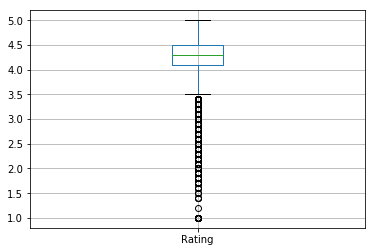

In [33]:
df.boxplot();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6FC9DDC18>]],
      dtype=object)

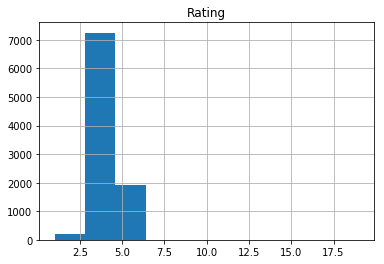

In [10]:
df.hist()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [34]:
df.drop([10472],inplace=True)

KeyError: '[10472] not found in axis'

In [14]:
df.shape

(10840, 13)

In [15]:
df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


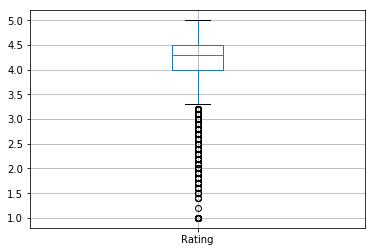

In [16]:
df.boxplot();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6FD7EED68>]],
      dtype=object)

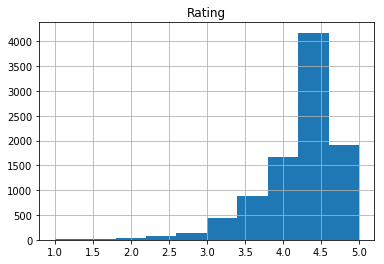

In [17]:

df.hist()

In [18]:
len(df)

10840

In [19]:
threshold=len(df)*0.1
threshold

1084.0

In [20]:
df.dropna(thresh=threshold,axis=1,inplace=True)

In [21]:
df.shape

(10840, 13)

In [22]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [23]:
def meanfill(series):
    return series.fillna(series.median())

In [24]:
df.Rating=df.Rating.transform(meanfill)

In [25]:
df.isna().sum() 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [26]:
df['Android Ver'].mode()

0    4.1 and up
dtype: object

In [27]:
df['Type'].mode()


0    Free
dtype: object

In [28]:
df['Current Ver'].mode()

0    Varies with device
dtype: object

In [29]:
df['Type'].fillna(df['Type'].mode().values[0],inplace=True)
df['Current Ver'].fillna(df['Current Ver'].mode().values[0],inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode().values[0],inplace=True)

In [30]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [31]:
df.Size.describe

<bound method NDFrame.describe of 0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
10                      28M
11                      12M
12                      20M
13                      21M
14                      37M
15                     2.7M
16                     5.5M
17                      17M
18                      39M
19                      31M
20                      14M
21                      12M
22                     4.2M
23                     7.0M
24                      23M
25                     6.0M
26                      25M
27                     6.1M
28                     4.6M
29                     4.2M
                ...        
10811                  3.9M
10812                   13M
10813                  2.7M
10814         

In [32]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [42]:
df[500:5010]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
500,"Blendr - Chat, Flirt & Meet",DATING,4.0,28671,Varies with device,1000000.0,Free,0.00,Mature 17+,Dating,"August 1, 2018",Varies with device,Varies with device
501,Free Dating Hook Up Messenger,DATING,3.3,1157,21M,100000.0,Free,0.00,Mature 17+,Dating,"January 27, 2017",5.0.1,4.2 and up
502,Find Real Love — YouLove Premium Dating,DATING,4.5,212626,11M,10000000.0,Free,0.00,Mature 17+,Dating,"July 31, 2018",4.17.2,4.1 and up
503,Once - Quality Matches Every day,DATING,4.4,222888,21M,1000000.0,Free,0.00,Mature 17+,Dating,"July 17, 2018",2.45,4.1 and up
504,BLK - Swipe. Match. Chat.,DATING,4.1,2067,24M,100000.0,Free,0.00,Mature 17+,Dating,"July 25, 2018",1.6.1,4.4 and up
505,Cougar Dating Life : Date Older Women Sugar Mummy,DATING,3.9,1643,31M,500000.0,Free,0.00,Mature 17+,Dating,"July 3, 2018",4.5.5,4.1 and up
506,Howlr,DATING,3.9,105,27M,5000.0,Free,0.00,Mature 17+,Dating,"June 19, 2018",1.0.4,4.4 and up
507,Stranger Chat & Date,DATING,3.6,3414,6.2M,500000.0,Free,0.00,Mature 17+,Dating,"June 6, 2018",1.2.1,4.1 and up
508,Free Dating & Flirt Chat - Choice of Love,DATING,4.0,42194,Varies with device,5000000.0,Free,0.00,Mature 17+,Dating,"July 24, 2018",Varies with device,Varies with device
509,RandoChat - Chat roulette,DATING,3.6,11806,12M,1000000.0,Free,0.00,Mature 17+,Dating,"June 26, 2018",4.0.18,4.0.3 and up


In [39]:
df['Price']=df['Price'].apply(lambda x: str(x).replace("$","") if "$" in str(x) else str(x))
df['Price']=df['Price'].apply(lambda x: float(x))
df['Reviews']=pd.to_numeric(df['Reviews'], errors="coerce")

In [40]:
df['Installs']=df['Installs'].apply(lambda x: str(x).replace("+","") if '+' in str(x) else str(x))
df["Installs"]=df["Installs"].apply(lambda x: str(x).replace(',',"") if ',' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x: float(x))

In [41]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [43]:
df[df.Price>0.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000.0,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000.0,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000.0,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000.0,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000.0,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000.0,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,1000.0,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
478,Truth or Dare Pro,DATING,4.3,0,20M,50.0,Paid,1.49,Teen,Dating,"September 1, 2017",1,4.0 and up
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,4.3,0,18k,100.0,Paid,2.99,Everyone,Dating,"July 25, 2017",1.0.1,4.0 and up
480,Ad Blocker for SayHi,DATING,4.3,4,1.2M,100.0,Paid,3.99,Teen,Dating,"August 2, 2018",1.2,4.0.3 and up


In [44]:
df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


# DATA VIZ


In [47]:
df2=df.groupby("Category")
x=df2.Rating.agg(np.mean)
y=df2.Price.agg(np.sum)
z=df2.Reviews.agg(np.mean)
print(x)
print(y)
print(z)


Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

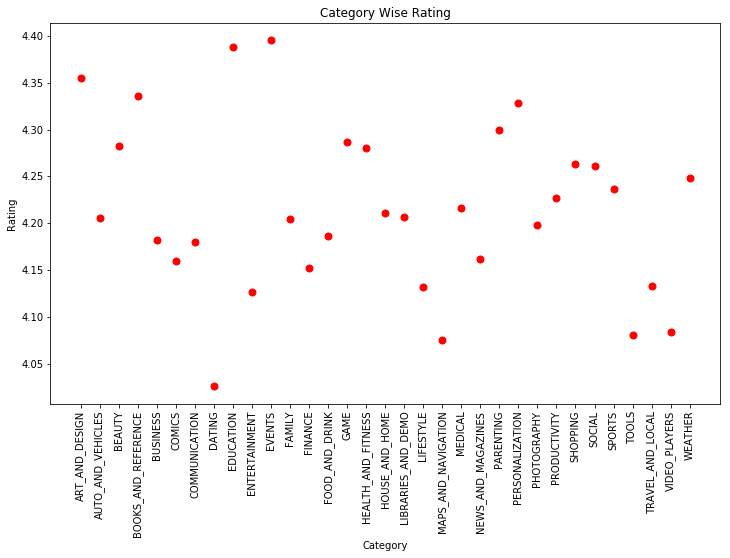

In [64]:
plt.figure(figsize=(12,7))
plt.plot(x,'ro',markersize=7)
plt.xticks(rotation=90)
plt.title("Category Wise Rating")
plt.ylabel("Rating")
plt.xlabel("Category")
plt.show()

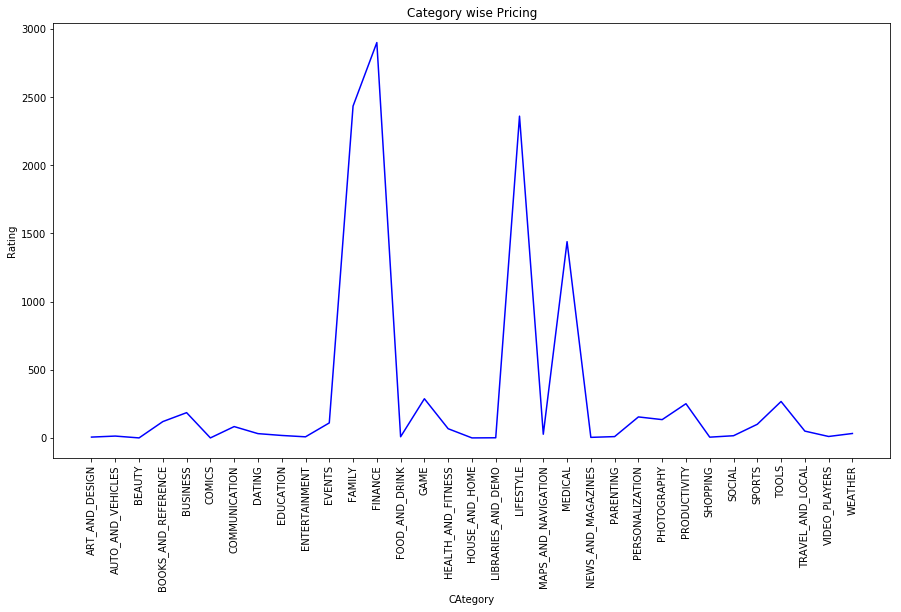

In [74]:
plt.figure(figsize=(15,8))
plt.plot(y,'b')
plt.xticks(rotation=90)
plt.title("Category wise Pricing")
plt.xlabel("CAtegory")
plt.ylabel("Rating")
plt.show();


Text(0.5, 1.0, 'Category wise Rating')

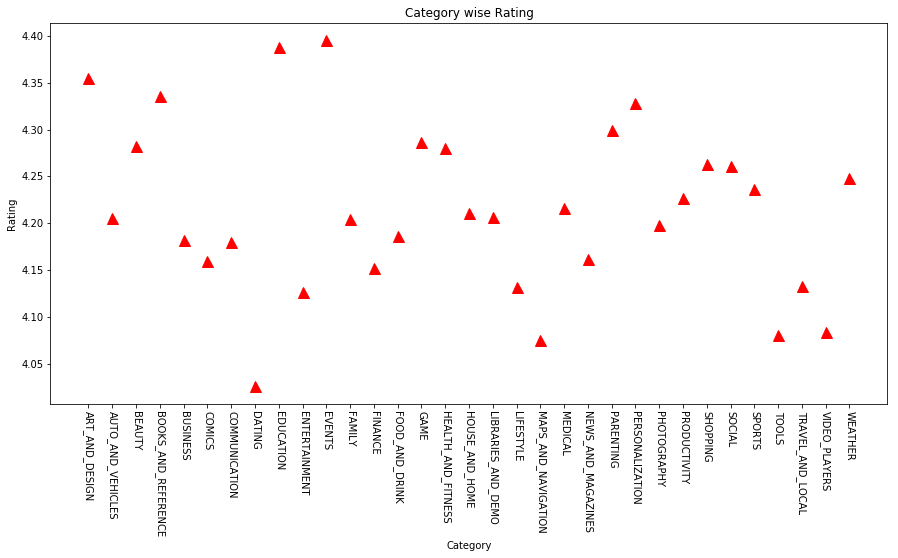

In [77]:
plt.figure(figsize=(15,7))
plt.plot(x,'r^',markersize=11)
plt.xticks(rotation=270)
plt.xlabel("Category")
plt.ylabel("Rating")
plt.title("Category wise Rating")